
 MACHINE LEARNING BASELINES - TRAINING PIPELINE

 LOADING DATA

Loading raw data and preprocessing...
Preprocessing data...
✓ Data loaded!
  Train: 4928 samples
  Validation: 870 samples
  Test: 1450 samples

 FEATURE EXTRACTION

Creating TF-IDF features...
  - N-gram range: (1, 3)
  - Max features: 5000

✓ Features created!
  Train shape: (4928, 5000)
  Val shape: (870, 5000)
  Test shape: (1450, 5000)
  Vocabulary size: 5000
  Sparsity: 99.78%

 LABEL ENCODING

Label mapping:
  NO → 0
  OO → 1
  OR → 2
  OS → 3

Class weights (for imbalance):
  NO: 0.4069
  OO: 0.7435
  OR: 6.6595
  OS: 21.2414

 TRAINING: LOGISTIC REGRESSION

Training model...
✓ Training complete!

Validation Set Performance:

 Logistic Regression - Validation
Overall Accuracy:  0.7609
Macro F1-Score:    0.5924
Weighted F1-Score: 0.7620

Per-Class Performance:
------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support
--------------------------------------

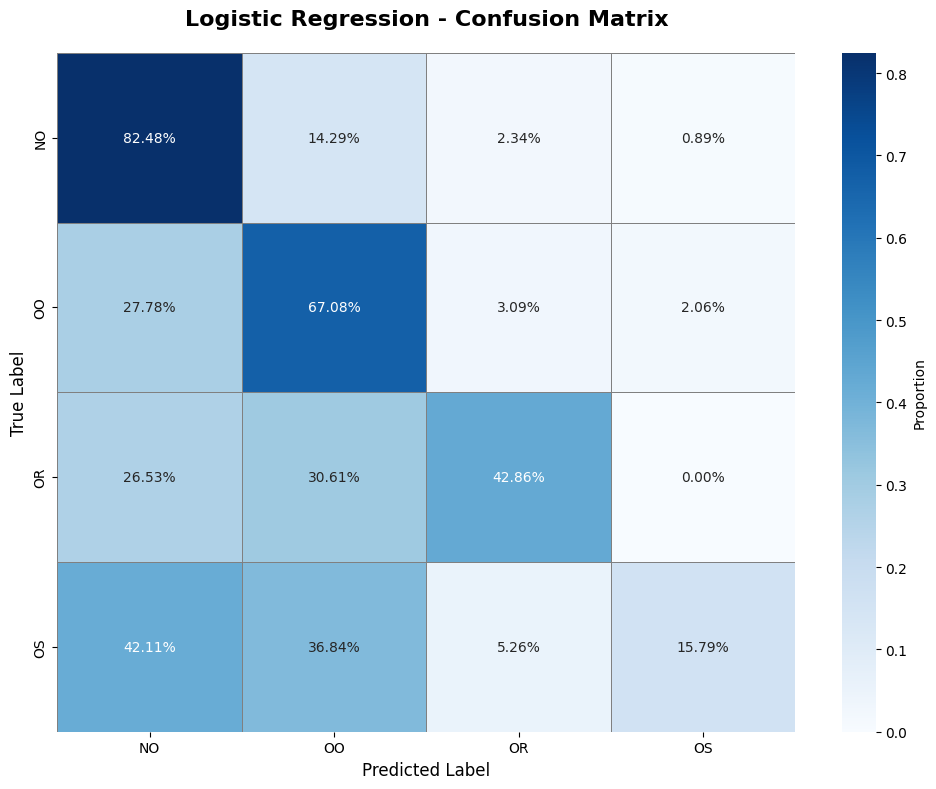

✓ Model saved to models/saved_models/logistic_regression_model.pkl

 TRAINING: SUPPORT VECTOR MACHINE

Training model...
✓ Training complete!

Validation Set Performance:

 SVM - Validation
Overall Accuracy:  0.7667
Macro F1-Score:    0.5683
Weighted F1-Score: 0.7640

Per-Class Performance:
------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support
------------------------------------------------------------
NO         0.8188       0.8801       0.8484       534
OO         0.7311       0.5939       0.6554       293
OR         0.4545       0.6061       0.5195       33
OS         0.2143       0.3000       0.2500       10


Test Set Performance:

 SVM - Test
Overall Accuracy:  0.7497
Macro F1-Score:    0.4931
Weighted F1-Score: 0.7446

Per-Class Performance:
------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support
--------------------------------------------------------

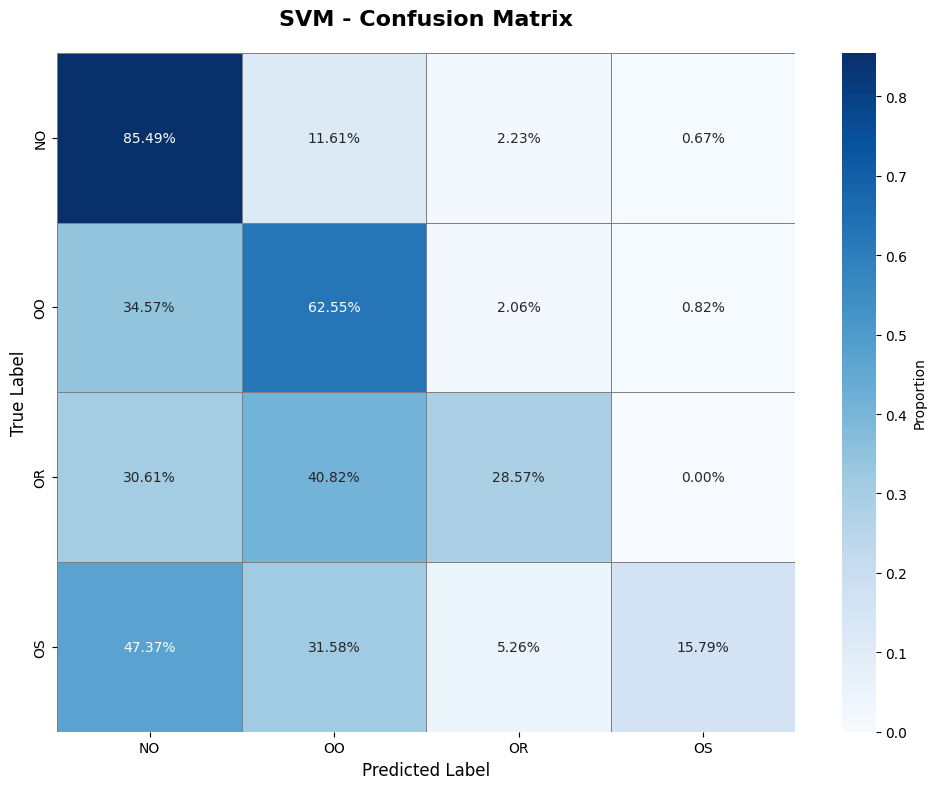

✓ Model saved to models/saved_models/svm_model.pkl

 TRAINING: NAIVE BAYES (with SMOTE)

Applying SMOTE oversampling...
  Original train size: 4928
  Resampled train size: 12112

Training model...
✓ Training complete!

Validation Set Performance:

 Naive Bayes - Validation
Overall Accuracy:  0.6736
Macro F1-Score:    0.4548
Weighted F1-Score: 0.7022

Per-Class Performance:
------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support
------------------------------------------------------------
NO         0.8347       0.7659       0.7988       534
OO         0.6814       0.5256       0.5934       293
OR         0.1800       0.5455       0.2707       33
OS         0.0926       0.5000       0.1562       10


Test Set Performance:

 Naive Bayes - Test
Overall Accuracy:  0.6724
Macro F1-Score:    0.4435
Weighted F1-Score: 0.6957

Per-Class Performance:
------------------------------------------------------------
Class      Precision  

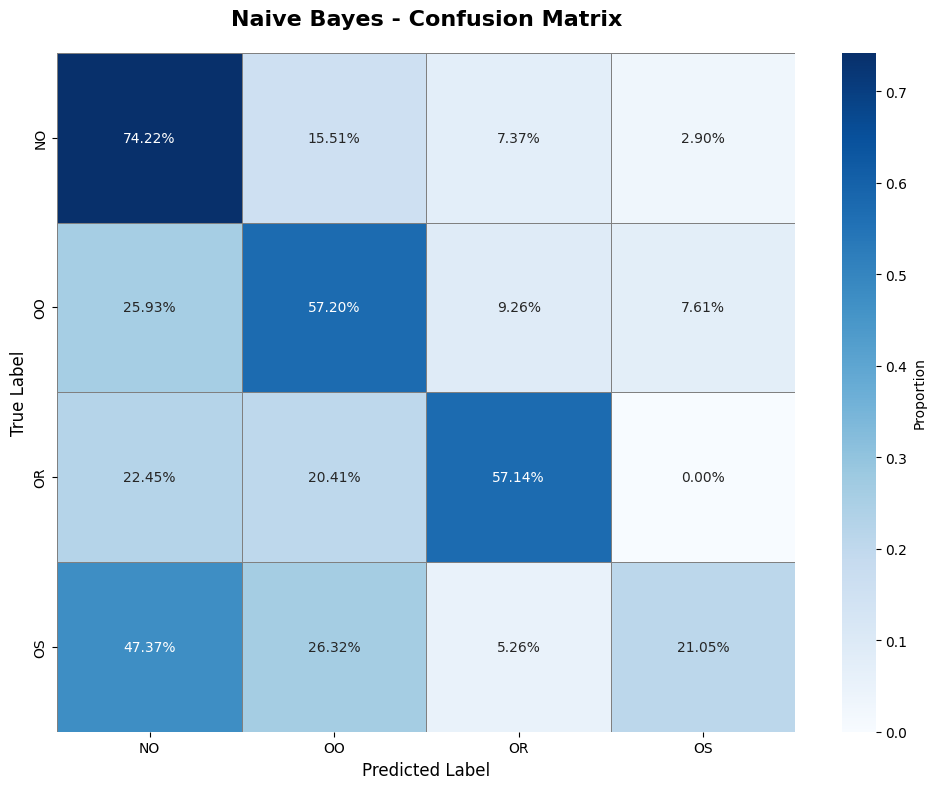

✓ Model saved to models/saved_models/naive_bayes_model.pkl

 TRAINING: RANDOM FOREST

Training model...
✓ Training complete!

Validation Set Performance:

 Random Forest - Validation
Overall Accuracy:  0.7172
Macro F1-Score:    0.4944
Weighted F1-Score: 0.6958

Per-Class Performance:
------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support
------------------------------------------------------------
NO         0.7589       0.9195       0.8315       534
OO         0.7431       0.3652       0.4897       293
OR         0.3692       0.7273       0.4898       33
OS         0.1429       0.2000       0.1667       10


Test Set Performance:

 Random Forest - Test
Overall Accuracy:  0.7014
Macro F1-Score:    0.4529
Weighted F1-Score: 0.6793

Per-Class Performance:
------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support
-----------------------------------------------------

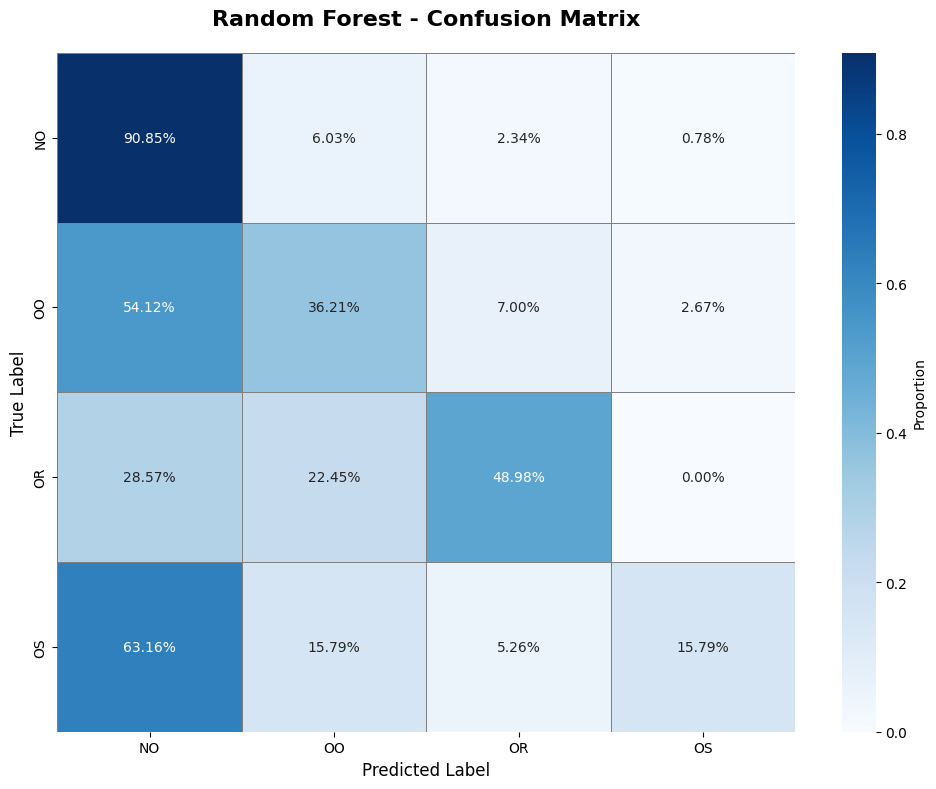

✓ Model saved to models/saved_models/random_forest_model.pkl

 MODEL COMPARISON

Test Set Performance Comparison:
              Model Accuracy Macro F1 Weighted F1  NO F1  OO F1  OR F1  OS F1
Logistic Regression   0.7510   0.5114      0.7523 0.8252 0.6778 0.3925 0.1500
                SVM   0.7497   0.4931      0.7446 0.8263 0.6609 0.2979 0.1875
        Naive Bayes   0.6724   0.4435      0.6957 0.7791 0.6057 0.2963 0.0930
      Random Forest   0.7014   0.4529      0.6793 0.8144 0.4822 0.3721 0.1429

✓ Comparison table saved to models/saved_models/ml_baselines_comparison.csv

🏆 Best Model: Logistic Regression
   Macro F1: 0.5114
Comparison plot saved to: models/saved_models\ml_comparison_chart.png


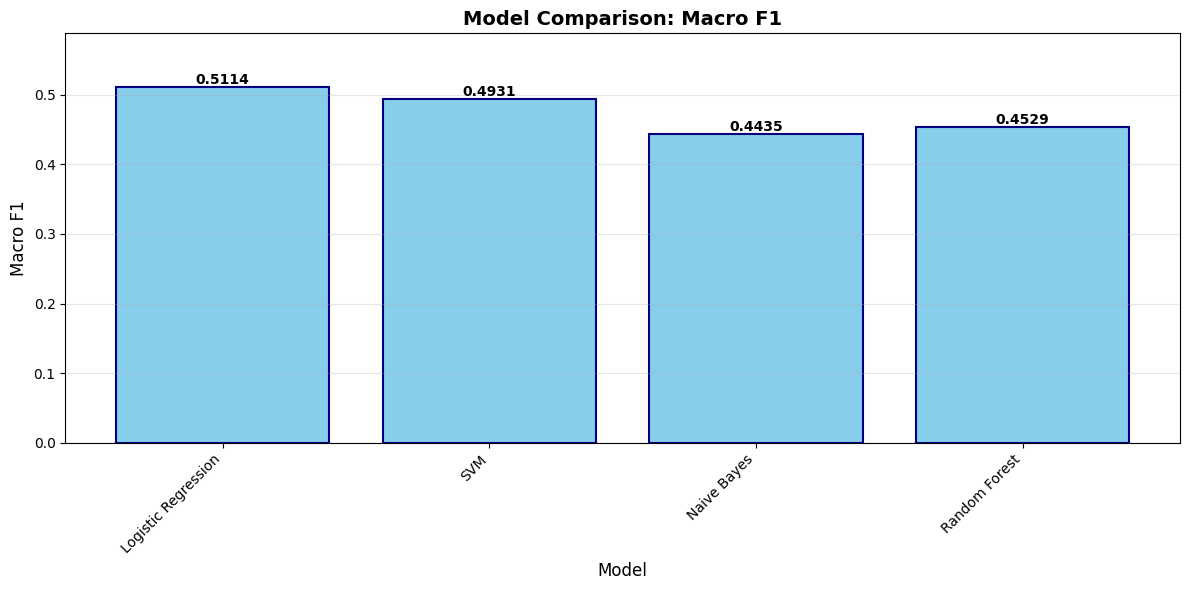


 SAVING ARTIFACTS

✓ TF-IDF vectorizer saved to models/saved_models\tfidf_vectorizer.pkl
✓ Label encoder saved to models/saved_models\label_encoder.pkl

 TRAINING COMPLETE!

📊 Summary:
  Models trained: 4
  Best model: Logistic Regression
  Best Macro F1: 0.5114

  Model performance:
    Logistic Regression  Macro F1: 0.5114  Accuracy: 0.7510
    SVM                  Macro F1: 0.4931  Accuracy: 0.7497
    Naive Bayes          Macro F1: 0.4435  Accuracy: 0.6724
    Random Forest        Macro F1: 0.4529  Accuracy: 0.7014

✓ Models saved to: models/saved_models/
✓ Comparison table: models/saved_models/ml_baselines_comparison.csv
✓ Confusion matrices: models/saved_models/*_confusion_matrix.png

🚀 Next Steps:
  1. Review confusion matrices for error analysis
  2. Check per-class F1 scores for minority classes (OR, OS)
  3. Proceed to deep learning models: python scripts/3_gru_model.py




In [12]:
"""
Machine Learning Baseline Models for Nepali Hate Speech Detection
Implements: Logistic Regression, SVM, Naive Bayes, Random Forest
"""
import os
import sys
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
sys.path.append(os.path.abspath(".."))

from utils.preprocessing import preprocess_for_ml_gru
from utils.evaluation import (
    compute_metrics, print_metrics, 
    plot_confusion_matrix, compare_models
)


def load_data(preprocessed=True):
    """Load train, val, test data."""
    print("\n" + "="*70)
    print(" LOADING DATA")
    print("="*70 + "\n")
    
    if preprocessed and os.path.exists('data/processed/train_preprocessed.json'):
        print("Loading preprocessed data...")
        train_df = pd.read_json('data/processed/train_preprocessed.json')
        val_df = pd.read_json('data/processed/val_preprocessed.json')
        test_df = pd.read_json('data/processed/test_preprocessed.json')
    else:
        print("Loading raw data and preprocessing...")
        train_df = pd.read_json('D:/major project/data/train.json')
        test_df = pd.read_json('D:/major project/data/test.json')
        
        # Create validation split
        from sklearn.model_selection import train_test_split
        train_df, val_df = train_test_split(
            train_df,
            test_size=0.15,
            stratify=train_df['Label_Multiclass'],
            random_state=42
        )
        
        # Preprocess
        print("Preprocessing data...")
        for df in [train_df, val_df, test_df]:
            df['clean_comment'] = df['Comment'].apply(preprocess_for_ml_gru)
    
    print(f"✓ Data loaded!")
    print(f"  Train: {len(train_df)} samples")
    print(f"  Validation: {len(val_df)} samples")
    print(f"  Test: {len(test_df)} samples")
    
    return train_df, val_df, test_df


def prepare_features(train_df, val_df, test_df, max_features=5000, ngram_range=(1, 3)):
    """Create TF-IDF features."""
    print("\n" + "="*70)
    print(" FEATURE EXTRACTION")
    print("="*70 + "\n")
    
    print(f"Creating TF-IDF features...")
    print(f"  - N-gram range: {ngram_range}")
    print(f"  - Max features: {max_features}")
    
    # Initialize vectorizer
    vectorizer = TfidfVectorizer(
        ngram_range=ngram_range,
        max_features=max_features,
        min_df=2,
        max_df=0.95,
        sublinear_tf=True
    )
    
    # Extract text
    X_train_texts = train_df['clean_comment']
    X_val_texts = val_df['clean_comment']
    X_test_texts = test_df['clean_comment']
    
    # Fit and transform
    X_train = vectorizer.fit_transform(X_train_texts)
    X_val = vectorizer.transform(X_val_texts)
    X_test = vectorizer.transform(X_test_texts)
    
    print(f"\n✓ Features created!")
    print(f"  Train shape: {X_train.shape}")
    print(f"  Val shape: {X_val.shape}")
    print(f"  Test shape: {X_test.shape}")
    print(f"  Vocabulary size: {len(vectorizer.vocabulary_)}")
    print(f"  Sparsity: {(1.0 - X_train.nnz / (X_train.shape[0] * X_train.shape[1])) * 100:.2f}%")
    
    return X_train, X_val, X_test, vectorizer


def prepare_labels(train_df, val_df, test_df):
    """Encode labels."""
    print("\n" + "="*70)
    print(" LABEL ENCODING")
    print("="*70 + "\n")
    
    # Initialize encoder
    le = LabelEncoder()
    
    # Fit on training labels
    le.fit(train_df['Label_Multiclass'])
    
    # Transform all sets
    y_train = le.transform(train_df['Label_Multiclass'])
    y_val = le.transform(val_df['Label_Multiclass'])
    y_test = le.transform(test_df['Label_Multiclass'])
    
    print(f"Label mapping:")
    for idx, label in enumerate(le.classes_):
        print(f"  {label} → {idx}")
    
    # Compute class weights
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    
    print(f"\nClass weights (for imbalance):")
    for label, weight in zip(le.classes_, class_weights):
        print(f"  {label}: {weight:.4f}")
    
    class_weight_dict = {i: w for i, w in enumerate(class_weights)}
    
    return y_train, y_val, y_test, le, class_weight_dict


def train_logistic_regression(X_train, y_train, X_val, y_val, X_test, y_test, 
                              class_weight_dict, le, save_dir):
    """Train Logistic Regression model."""
    print("\n" + "="*70)
    print(" TRAINING: LOGISTIC REGRESSION")
    print("="*70 + "\n")
    
    model = LogisticRegression(
        max_iter=1000,
        class_weight=class_weight_dict,
        random_state=42,
        solver='lbfgs',
        C=1.0
    )
    
    print("Training model...")
    model.fit(X_train, y_train)
    print("✓ Training complete!")
    
    # Validation performance
    print("\nValidation Set Performance:")
    y_val_pred = model.predict(X_val)
    val_metrics = compute_metrics(y_val, y_val_pred, labels=le.classes_)
    print_metrics(val_metrics, title="Logistic Regression - Validation")
    
    # Test performance
    print("\nTest Set Performance:")
    y_test_pred = model.predict(X_test)
    test_metrics = compute_metrics(y_test, y_test_pred, labels=le.classes_)
    print_metrics(test_metrics, title="Logistic Regression - Test")
    
    # Confusion matrix
    plot_confusion_matrix(
        y_test, y_test_pred,
        labels=le.classes_,
        save_path=os.path.join(save_dir, 'lr_confusion_matrix.png'),
        title="Logistic Regression - Confusion Matrix"
    )
    
    # Save model
    joblib.dump(model, os.path.join(save_dir, 'logistic_regression_model.pkl'))
    print(f"✓ Model saved to {save_dir}/logistic_regression_model.pkl")
    
    return model, test_metrics


def train_svm(X_train, y_train, X_val, y_val, X_test, y_test, 
              class_weight_dict, le, save_dir):
    """Train SVM model."""
    print("\n" + "="*70)
    print(" TRAINING: SUPPORT VECTOR MACHINE")
    print("="*70 + "\n")
    
    model = LinearSVC(
        class_weight=class_weight_dict,
        random_state=42,
        max_iter=2000,
        C=1.0,
        loss='hinge'
    )
    
    print("Training model...")
    model.fit(X_train, y_train)
    print("✓ Training complete!")
    
    # Validation performance
    print("\nValidation Set Performance:")
    y_val_pred = model.predict(X_val)
    val_metrics = compute_metrics(y_val, y_val_pred, labels=le.classes_)
    print_metrics(val_metrics, title="SVM - Validation")
    
    # Test performance
    print("\nTest Set Performance:")
    y_test_pred = model.predict(X_test)
    test_metrics = compute_metrics(y_test, y_test_pred, labels=le.classes_)
    print_metrics(test_metrics, title="SVM - Test")
    
    # Confusion matrix
    plot_confusion_matrix(
        y_test, y_test_pred,
        labels=le.classes_,
        save_path=os.path.join(save_dir, 'svm_confusion_matrix.png'),
        title="SVM - Confusion Matrix"
    )
    
    # Save model
    joblib.dump(model, os.path.join(save_dir, 'svm_model.pkl'))
    print(f"✓ Model saved to {save_dir}/svm_model.pkl")
    
    return model, test_metrics


def train_naive_bayes(X_train, y_train, X_val, y_val, X_test, y_test, 
                      le, save_dir):
    """Train Naive Bayes with SMOTE."""
    print("\n" + "="*70)
    print(" TRAINING: NAIVE BAYES (with SMOTE)")
    print("="*70 + "\n")
    
    # Apply SMOTE
    print("Applying SMOTE oversampling...")
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    print(f"  Original train size: {X_train.shape[0]}")
    print(f"  Resampled train size: {X_train_res.shape[0]}")
    
    model = MultinomialNB(alpha=1.0)
    
    print("\nTraining model...")
    model.fit(X_train_res, y_train_res)
    print("✓ Training complete!")
    
    # Validation performance
    print("\nValidation Set Performance:")
    y_val_pred = model.predict(X_val)
    val_metrics = compute_metrics(y_val, y_val_pred, labels=le.classes_)
    print_metrics(val_metrics, title="Naive Bayes - Validation")
    
    # Test performance
    print("\nTest Set Performance:")
    y_test_pred = model.predict(X_test)
    test_metrics = compute_metrics(y_test, y_test_pred, labels=le.classes_)
    print_metrics(test_metrics, title="Naive Bayes - Test")
    
    # Confusion matrix
    plot_confusion_matrix(
        y_test, y_test_pred,
        labels=le.classes_,
        save_path=os.path.join(save_dir, 'nb_confusion_matrix.png'),
        title="Naive Bayes - Confusion Matrix"
    )
    
    # Save model
    joblib.dump(model, os.path.join(save_dir, 'naive_bayes_model.pkl'))
    print(f"✓ Model saved to {save_dir}/naive_bayes_model.pkl")
    
    return model, test_metrics


def train_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, 
                       class_weight_dict, le, save_dir):
    """Train Random Forest model."""
    print("\n" + "="*70)
    print(" TRAINING: RANDOM FOREST")
    print("="*70 + "\n")
    
    model = RandomForestClassifier(
        n_estimators=100,
        class_weight=class_weight_dict,
        random_state=42,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
    )
    
    print("Training model...")
    model.fit(X_train, y_train)
    print("✓ Training complete!")
    
    # Validation performance
    print("\nValidation Set Performance:")
    y_val_pred = model.predict(X_val)
    val_metrics = compute_metrics(y_val, y_val_pred, labels=le.classes_)
    print_metrics(val_metrics, title="Random Forest - Validation")
    
    # Test performance
    print("\nTest Set Performance:")
    y_test_pred = model.predict(X_test)
    test_metrics = compute_metrics(y_test, y_test_pred, labels=le.classes_)
    print_metrics(test_metrics, title="Random Forest - Test")
    
    # Confusion matrix
    plot_confusion_matrix(
        y_test, y_test_pred,
        labels=le.classes_,
        save_path=os.path.join(save_dir, 'rf_confusion_matrix.png'),
        title="Random Forest - Confusion Matrix"
    )
    
    # Save model
    joblib.dump(model, os.path.join(save_dir, 'random_forest_model.pkl'))
    print(f"✓ Model saved to {save_dir}/random_forest_model.pkl")
    
    return model, test_metrics


def compare_all_models(results_dict, save_dir):
    """Compare all trained models."""
    print("\n" + "="*70)
    print(" MODEL COMPARISON")
    print("="*70 + "\n")
    
    # Create comparison DataFrame
    comparison_data = []
    for model_name, metrics in results_dict.items():
        comparison_data.append({
            'Model': model_name,
            'Accuracy': f"{metrics['accuracy']:.4f}",
            'Macro F1': f"{metrics['macro_f1']:.4f}",
            'Weighted F1': f"{metrics['weighted_f1']:.4f}",
            'NO F1': f"{metrics['per_class']['NO']['f1']:.4f}",
            'OO F1': f"{metrics['per_class']['OO']['f1']:.4f}",
            'OR F1': f"{metrics['per_class']['OR']['f1']:.4f}",
            'OS F1': f"{metrics['per_class']['OS']['f1']:.4f}"
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    print("Test Set Performance Comparison:")
    print("="*70)
    print(comparison_df.to_string(index=False))
    
    # Save comparison table
    comparison_df.to_csv(os.path.join(save_dir, 'ml_baselines_comparison.csv'), index=False)
    print(f"\n✓ Comparison table saved to {save_dir}/ml_baselines_comparison.csv")
    
    # Find best model
    macro_f1_values = {name: metrics['macro_f1'] for name, metrics in results_dict.items()}
    best_model = max(macro_f1_values, key=macro_f1_values.get)
    best_f1 = macro_f1_values[best_model]
    
    print(f"\n🏆 Best Model: {best_model}")
    print(f"   Macro F1: {best_f1:.4f}")
    
    # Visualize comparison
    try:
        compare_models(
            {name: {'macro_f1': metrics['macro_f1']} for name, metrics in results_dict.items()},
            metric='macro_f1',
            save_path=os.path.join(save_dir, 'ml_comparison_chart.png')
        )
    except Exception as e:
        print(f"Could not create comparison chart: {str(e)}")
    
    return comparison_df, best_model


def save_artifacts(vectorizer, le, save_dir):
    """Save vectorizer and label encoder."""
    print("\n" + "="*70)
    print(" SAVING ARTIFACTS")
    print("="*70 + "\n")
    
    vectorizer_path = os.path.join(save_dir, 'tfidf_vectorizer.pkl')
    le_path = os.path.join(save_dir, 'label_encoder.pkl')
    
    joblib.dump(vectorizer, vectorizer_path)
    joblib.dump(le, le_path)
    
    print(f"✓ TF-IDF vectorizer saved to {vectorizer_path}")
    print(f"✓ Label encoder saved to {le_path}")


def main():
    """Main training pipeline for ML baselines."""
    print("\n" + "="*70)
    print(" MACHINE LEARNING BASELINES - TRAINING PIPELINE")
    print("="*70)
    
    # Create save directory
    save_dir = 'models/saved_models'
    os.makedirs(save_dir, exist_ok=True)
    
    # Step 1: Load data
    train_df, val_df, test_df = load_data(preprocessed=False)
    
    # Step 2: Prepare features
    X_train, X_val, X_test, vectorizer = prepare_features(
        train_df, val_df, test_df,
        max_features=5000,
        ngram_range=(1, 3)
    )
    
    # Step 3: Prepare labels
    y_train, y_val, y_test, le, class_weight_dict = prepare_labels(
        train_df, val_df, test_df
    )
    
    # Step 4: Train models
    results = {}
    
    # Logistic Regression
    lr_model, lr_metrics = train_logistic_regression(
        X_train, y_train, X_val, y_val, X_test, y_test,
        class_weight_dict, le, save_dir
    )
    results['Logistic Regression'] = lr_metrics
    
    # SVM
    svm_model, svm_metrics = train_svm(
        X_train, y_train, X_val, y_val, X_test, y_test,
        class_weight_dict, le, save_dir
    )
    results['SVM'] = svm_metrics
    
    # Naive Bayes
    nb_model, nb_metrics = train_naive_bayes(
        X_train, y_train, X_val, y_val, X_test, y_test,
        le, save_dir
    )
    results['Naive Bayes'] = nb_metrics
    
    # Random Forest
    rf_model, rf_metrics = train_random_forest(
        X_train, y_train, X_val, y_val, X_test, y_test,
        class_weight_dict, le, save_dir
    )
    results['Random Forest'] = rf_metrics
    
    # Step 5: Compare models
    comparison_df, best_model = compare_all_models(results, save_dir)
    
    # Step 6: Save artifacts
    save_artifacts(vectorizer, le, save_dir)
    
    # Final summary
    print("\n" + "="*70)
    print(" TRAINING COMPLETE!")
    print("="*70)
    print("\n📊 Summary:")
    print(f"  Models trained: {len(results)}")
    print(f"  Best model: {best_model}")
    print(f"  Best Macro F1: {results[best_model]['macro_f1']:.4f}")
    print(f"\n  Model performance:")
    for model_name, metrics in results.items():
        print(f"    {model_name:<20} Macro F1: {metrics['macro_f1']:.4f}  Accuracy: {metrics['accuracy']:.4f}")
    
    print(f"\n✓ Models saved to: {save_dir}/")
    print(f"✓ Comparison table: {save_dir}/ml_baselines_comparison.csv")
    print(f"✓ Confusion matrices: {save_dir}/*_confusion_matrix.png")
    
    print("\n🚀 Next Steps:")
    print("  1. Review confusion matrices for error analysis")
    print("  2. Check per-class F1 scores for minority classes (OR, OS)")
    print("  3. Proceed to deep learning models: python scripts/3_gru_model.py")
    
    print("\n" + "="*70 + "\n")
    
    return results


if __name__ == "__main__":
    try:
        results = main()
    except KeyboardInterrupt:
        print("\n\n⚠️  Training interrupted by user")
    except Exception as e:
        print(f"\n\n❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()